In [18]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt

In [79]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_orig_train = np.copy(y_train)
y_orig_test = np.copy(y_test)
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [80]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

try:
    model = load_model("/home/amithmkini/Projects/fooling-dnn/examples/saved_models/keras_cifar10_trained_model.h5")
except ValueError:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    # initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
    
    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    if not data_augmentation:
        print('Not using data augmentation.')
        model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
    
        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)
    
        # Fit the model on the batches generated by datagen.flow().
        model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            workers=4)


In [81]:

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


   32/10000 [..............................] - ETA: 69s

  224/10000 [..............................] - ETA: 12s

  384/10000 [>.............................] - ETA: 8s 

  672/10000 [=>............................] - ETA: 5s

  896/10000 [=>............................] - ETA: 4s

 1152/10000 [==>...........................] - ETA: 3s

 1408/10000 [===>..........................] - ETA: 3s

 1664/10000 [===>..........................] - ETA: 2s

 1920/10000 [====>.........................] - ETA: 2s

 2176/10000 [=====>........................] - ETA: 2s

 2432/10000 [======>.......................] - ETA: 2s

 2720/10000 [=======>......................] - ETA: 2s

 2912/10000 [=======>......................] - ETA: 2s

 3200/10000 [========>.....................] - ETA: 1s

 3488/10000 [=========>....................] - ETA: 1s

 3744/10000 [==========>...................] - ETA: 1s

 4064/10000 [===========>..................] - ETA: 1s

 4352/10000 [============>.................] - ETA: 1s

 4672/10000 [=============>................] - ETA: 1s

 4960/10000 [=============>................] - ETA: 1s

 5248/10000 [==============>...............] - ETA: 1s

 5536/10000 [===============>..............] - ETA: 1s

 5856/10000 [================>.............] - ETA: 0s

 6112/10000 [=================>............] - ETA: 0s

 6400/10000 [==================>...........] - ETA: 0s

 6624/10000 [==================>...........] - ETA: 0s

 6944/10000 [===================>..........] - ETA: 0s

 7136/10000 [====================>.........] - ETA: 0s

 7456/10000 [=====================>........] - ETA: 0s

 7776/10000 [======================>.......] - ETA: 0s

 8096/10000 [=======================>......] - ETA: 0s

 8384/10000 [========================>.....] - ETA: 0s

 8736/10000 [=========================>....] - ETA: 0s

 9024/10000 [==========================>...] - ETA: 0s

 9280/10000 [==========================>...] - ETA: 0s

 9536/10000 [===========================>..] - ETA: 0s

 9792/10000 [============================>.] - ETA: 0s

Test loss: 1.30961988888
Test accuracy: 0.594


In [82]:
del scores

In [83]:
def mutation_manager(data, indices):
    cols = data.shape[1]
        
    for x in indices:
        row_no = int(x/cols)
        col_no = x % cols
        data[row_no, col_no] = np.random.random()
        
    return data

In [94]:
def roulette_select(population, fitnesses, num):
    total_fitness = float(sum(fitnesses))
    rel_fitness = [f/total_fitness for f in fitnesses]
    # Generate probability intervals for each individual
    probs = [sum(rel_fitness[:i+1]) for i in range(len(rel_fitness))]
    # Draw new population
    new_population = []
    for n in range(num):
        r = np.random.random()
        for (i, individual) in enumerate(population):
            if r <= probs[i]:
                new_population.append((individual, fitnesses[i]))
                break
    return new_population

In [84]:
def crossover_manager(genome1, genome2):
    random_index_to_cut = int(np.random.random() * len(genome1))
    new1 = list(genome1[:random_index_to_cut]) + list(genome2[random_index_to_cut:])
    new2 = list(genome2[:random_index_to_cut]) + list(genome1[random_index_to_cut:])
    
    return np.asarray(new1), np.asarray(new2)

In [85]:
def genetic_op(data, required_val, mutation_rate, crossover_rate):
    # Crossover operation
    no_of_crossovers = int(data.shape[0] * crossover_rate)
    indices_to_crossover = np.random.choice(data.shape[0], no_of_crossovers, replace=False)
    data_to_be_crossover = data[indices_to_crossover]
    
    for x in range(0, len(indices_to_crossover) - 1, 2):
        genome1 = data_to_be_crossover[x]
        genome2 = data_to_be_crossover[x+1]
        ind1 = indices_to_crossover[x]
        ind2 = indices_to_crossover[x+1]
        new1, new2 = crossover_manager(genome1, genome2)
        data[ind1] = new1
        data[ind2] = new2
    
    # Now for the mutation operation
    no_of_mutations = int(data.shape[0] * data.shape[1] * mutation_rate)
    indices_to_mutate = np.random.choice(data.shape[0] * data.shape[1], no_of_mutations, replace=False)
    data = mutation_manager(data, indices_to_mutate)
    
    # Finally fitness
    y = data.reshape(data.shape[0], 32, 32, 3)
    r = model.predict(y)
    fitness = r[:, required_val]

    return data, fitness

In [147]:
num = []

for x in range(10):
    indices = np.argwhere(y_orig_train == x)[:, 0].reshape((-1,))
    num.append(x_train[indices])

num = np.asarray(num)

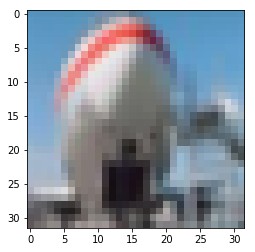

In [148]:
test = num[0][12]

# test = x_train[0]

plt.imshow(test)
plt.show()

In [144]:
def add_noise(img, _):
    random_noise = np.random.random((32, 32, 3)) * np.random.random((32, 32, 3)) * \
                   np.random.random((32, 32, 3)) * np.random.random((32, 32, 3)) 
    return np.clip(img + random_noise, 0, 1)

In [150]:
chosen_ones = []
print(num.shape)
for j in range(10):
    numbers = num[j]
    print(numbers.shape)
    r = model.predict(numbers)
    new = [numbers[i] for i in range(len(r)) if r[i][j] > .8]
    new = np.array(new)
    chosen_ones.append(new)
    
chosen_ones = np.array(chosen_ones)

(10, 5000, 32, 32, 3)
(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


(5000, 32, 32, 3)


In [151]:
new_num = []

for x in range(10):
    numbers = chosen_ones[x]
    final_image = np.apply_over_axes(add_noise, numbers, [0])
    new_num.append(final_image)
    # new_num.append(numbers)

new_num = np.asarray(new_num)

In [152]:
final = [x[:20] for x in new_num]
new_num = np.array(final)

In [154]:
temp = new_num[0][1]

r = model.predict(temp.reshape(1, 32, 32, 3))

print(r)

[[ 0.24432808  0.03295448  0.10205141  0.08814015  0.06360687  0.05896232
   0.0462504   0.03440733  0.26770195  0.06159704]]


In [167]:
init_crossover_rate = 0.05
init_mutation_rate = 0.1
population_size = 100
generations = 200

promotion_rate = 0.1
multiplier = int(1 / promotion_rate)

fit_num = []

# Now for each number we have to create noisy initial population.
try:
    for numb in range(10):
        rates_reduce = False
        mutation_rate = init_mutation_rate
        crossover_rate = init_crossover_rate
        required_val = numb
        print("Now evaluating for number", required_val)
        initial_popl = new_num[numb].reshape(
            new_num[numb].shape[0],
            new_num[numb].shape[1] * new_num[numb].shape[2] * new_num[numb].shape[3]
        )
        initial_popl = np.tile(initial_popl, (population_size // new_num[numb].shape[0], 1))
        prev_popl = [[0, 0]]
        
        for gen in range(generations):
            
            change = False
            while not change:
                data, fitness = genetic_op(initial_popl, required_val, crossover_rate, mutation_rate)
                data_with_fitness = zip(data, fitness)
                data_with_fitness = sorted(data_with_fitness, key=lambda x: x[1], reverse=True)
    
                # Now select the promoted data for the next round
                promotion = data_with_fitness[:int(population_size * promotion_rate)]
                # promotion = roulette_select(list(data), fitness, int(population_size * promotion_rate))
                if prev_popl[0][1] > promotion[0][1]:
                    initial_popl = np.asarray([x[0] for x in prev_popl])
                else:
                    only_data = [x[0] for x in promotion]
                    initial_popl = np.asarray(only_data * multiplier)
                    prev_popl = promotion * multiplier
                    saved_gen = gen
                    change = True
            print("Max fitness for gen {} is {}".format(gen, promotion[0][1]))
            if (promotion[0][1] > .80 and gen > 50) or (promotion[0][1] > 0.95):
                print("Adding the image to the new array...")
                fit_num.append(promotion[0][0])
                break
except KeyboardInterrupt:
    print("GA stopped!")

Now evaluating for number 0
Max fitness for gen 0 is 0.09553127735853195
Max fitness for gen 1 is 0.09585779905319214


Max fitness for gen 2 is 0.09731978923082352
Max fitness for gen 3 is 0.11347579956054688


Max fitness for gen 4 is 0.1144934669137001


Max fitness for gen 5 is 0.1265535056591034
Max fitness for gen 6 is 0.13456952571868896


Max fitness for gen 7 is 0.1398446410894394
Max fitness for gen 8 is 0.14374694228172302
Max fitness for gen 9 is 0.15230780839920044


Max fitness for gen 10 is 0.15890736877918243
Max fitness for gen 11 is 0.17577940225601196


Max fitness for gen 12 is 0.17830486595630646


Max fitness for gen 13 is 0.2320164144039154


Max fitness for gen 14 is 0.23898403346538544
Max fitness for gen 15 is 0.24156822264194489


Max fitness for gen 16 is 0.2671043276786804
Max fitness for gen 17 is 0.2828696370124817


Max fitness for gen 18 is 0.2879730761051178
Max fitness for gen 19 is 0.302890807390213


Max fitness for gen 20 is 0.33524835109710693
Max fitness for gen 21 is 0.34401461482048035
Max fitness for gen 22 is 0.3547021150588989


Max fitness for gen 23 is 0.35572993755340576
Max fitness for gen 24 is 0.36746907234191895


Max fitness for gen 25 is 0.4051617383956909


Max fitness for gen 26 is 0.4199730157852173


Max fitness for gen 27 is 0.45052698254585266
Max fitness for gen 28 is 0.48233386874198914


Max fitness for gen 29 is 0.5283153653144836


Max fitness for gen 30 is 0.5412775278091431


Max fitness for gen 31 is 0.57487952709198
Max fitness for gen 32 is 0.6941332817077637


Max fitness for gen 33 is 0.7156596779823303


Max fitness for gen 34 is 0.7440512776374817
Max fitness for gen 35 is 0.7729272246360779


Max fitness for gen 36 is 0.8025392889976501
Max fitness for gen 37 is 0.8090164065361023


Max fitness for gen 38 is 0.8262796998023987


Max fitness for gen 39 is 0.8297232389450073


Max fitness for gen 40 is 0.8674812912940979


Max fitness for gen 41 is 0.8681473135948181
Max fitness for gen 42 is 0.8806465864181519


Max fitness for gen 43 is 0.8851853013038635


Max fitness for gen 44 is 0.8880783915519714


Max fitness for gen 45 is 0.905670702457428


Max fitness for gen 46 is 0.906091034412384


Max fitness for gen 47 is 0.9109829664230347


Max fitness for gen 48 is 0.9119731187820435
Max fitness for gen 49 is 0.9356136322021484


Max fitness for gen 50 is 0.9660277366638184
Adding the image to the new array...
Now evaluating for number 1
Max fitness for gen 0 is 0.4382953345775604


Max fitness for gen 1 is 0.4939917325973511


Max fitness for gen 2 is 0.5391116142272949


Max fitness for gen 3 is 0.6683709621429443


Max fitness for gen 4 is 0.7853267788887024


Max fitness for gen 5 is 0.8317369818687439


Max fitness for gen 6 is 0.9152241945266724
Max fitness for gen 7 is 0.9219631552696228


Max fitness for gen 8 is 0.9633616209030151
Adding the image to the new array...
Now evaluating for number 2
Max fitness for gen 0 is 0.24801422655582428
Max fitness for gen 1 is 0.2890705466270447
Max fitness for gen 2 is 0.35095882415771484


Max fitness for gen 3 is 0.36589357256889343
Max fitness for gen 4 is 0.37992796301841736
Max fitness for gen 5 is 0.4669713079929352


Max fitness for gen 6 is 0.47465166449546814
Max fitness for gen 7 is 0.5319141745567322


Max fitness for gen 8 is 0.6078200340270996
Max fitness for gen 9 is 0.6204437017440796


Max fitness for gen 10 is 0.7322074174880981


Max fitness for gen 11 is 0.7639941573143005
Max fitness for gen 12 is 0.8132648468017578


Max fitness for gen 13 is 0.8315544128417969
Max fitness for gen 14 is 0.8794388175010681


Max fitness for gen 15 is 0.8801272511482239


Max fitness for gen 16 is 0.9137820601463318


Max fitness for gen 17 is 0.9329164028167725
Max fitness for gen 18 is 0.9646196365356445
Adding the image to the new array...
Now evaluating for number 3
Max fitness for gen 0 is 0.22397668659687042
Max fitness for gen 1 is 0.2444366216659546


Max fitness for gen 2 is 0.2658228874206543
Max fitness for gen 3 is 0.27508774399757385
Max fitness for gen 4 is 0.3216889500617981


Max fitness for gen 5 is 0.32221996784210205


Max fitness for gen 6 is 0.33532336354255676


Max fitness for gen 7 is 0.34922415018081665


Max fitness for gen 8 is 0.37513548135757446


Max fitness for gen 9 is 0.3815494477748871


Max fitness for gen 10 is 0.4017975628376007
Max fitness for gen 11 is 0.41147857904434204


Max fitness for gen 12 is 0.4412575662136078


Max fitness for gen 13 is 0.46875810623168945


Max fitness for gen 14 is 0.46993058919906616


Max fitness for gen 15 is 0.49110984802246094


Max fitness for gen 16 is 0.5430654287338257


Max fitness for gen 17 is 0.5741002559661865
Max fitness for gen 18 is 0.6100030541419983


Max fitness for gen 19 is 0.6560126543045044


Max fitness for gen 20 is 0.6990986466407776


Max fitness for gen 21 is 0.7279441952705383


Max fitness for gen 22 is 0.7752309441566467


Max fitness for gen 23 is 0.8183188438415527


Max fitness for gen 24 is 0.8239318132400513


Max fitness for gen 25 is 0.8344479203224182


Max fitness for gen 26 is 0.864859938621521


Max fitness for gen 27 is 0.8771511912345886


Max fitness for gen 28 is 0.8870730400085449
Max fitness for gen 29 is 0.905711829662323


Max fitness for gen 30 is 0.9065424203872681


Max fitness for gen 31 is 0.9074221849441528


Max fitness for gen 32 is 0.9112063050270081


Max fitness for gen 33 is 0.9224738478660583


Max fitness for gen 34 is 0.9245070219039917


Max fitness for gen 35 is 0.9374556541442871


Max fitness for gen 36 is 0.9396751523017883


Max fitness for gen 37 is 0.9430752396583557


Max fitness for gen 38 is 0.9542174935340881
Adding the image to the new array...
Now evaluating for number 4
Max fitness for gen 0 is 0.26483994722366333
Max fitness for gen 1 is 0.27657246589660645
Max fitness for gen 2 is 0.27799421548843384
Max fitness for gen 3 is 0.31483933329582214


Max fitness for gen 4 is 0.36844855546951294
Max fitness for gen 5 is 0.37123608589172363
Max fitness for gen 6 is 0.4107326567173004
Max fitness for gen 7 is 0.5582285523414612


Max fitness for gen 8 is 0.6931440830230713
Max fitness for gen 9 is 0.7205516695976257
Max fitness for gen 10 is 0.7683659791946411
Max fitness for gen 11 is 0.8535358309745789


Max fitness for gen 12 is 0.8845621347427368
Max fitness for gen 13 is 0.9363904595375061
Max fitness for gen 14 is 0.9559621214866638
Adding the image to the new array...
Now evaluating for number 5


Max fitness for gen 0 is 0.2691587209701538
Max fitness for gen 1 is 0.3120196759700775


Max fitness for gen 2 is 0.33821702003479004


Max fitness for gen 3 is 0.3895871937274933
Max fitness for gen 4 is 0.39855438470840454


Max fitness for gen 5 is 0.40684378147125244


Max fitness for gen 6 is 0.4914434850215912


Max fitness for gen 7 is 0.5229268670082092


Max fitness for gen 8 is 0.5647287964820862


Max fitness for gen 9 is 0.7209550738334656


Max fitness for gen 10 is 0.7935147881507874


Max fitness for gen 11 is 0.8104555606842041


Max fitness for gen 12 is 0.8171010613441467
Max fitness for gen 13 is 0.8611699342727661


Max fitness for gen 14 is 0.8859469294548035
Max fitness for gen 15 is 0.8962286710739136


Max fitness for gen 16 is 0.8981115818023682


Max fitness for gen 17 is 0.9176568984985352


Max fitness for gen 18 is 0.9377330541610718


Max fitness for gen 19 is 0.94276362657547
Max fitness for gen 20 is 0.9751132726669312
Adding the image to the new array...
Now evaluating for number 6
Max fitness for gen 0 is 0.2644801139831543


Max fitness for gen 1 is 0.2734582722187042


Max fitness for gen 2 is 0.2844458818435669


Max fitness for gen 3 is 0.3374009132385254


Max fitness for gen 4 is 0.35346686840057373
Max fitness for gen 5 is 0.40173885226249695


Max fitness for gen 6 is 0.4766653776168823


Max fitness for gen 7 is 0.5031111836433411


Max fitness for gen 8 is 0.513664960861206


Max fitness for gen 9 is 0.5832973718643188


Max fitness for gen 10 is 0.6271947622299194


Max fitness for gen 11 is 0.6999940276145935


Max fitness for gen 12 is 0.7084729671478271


Max fitness for gen 13 is 0.7354756593704224


Max fitness for gen 14 is 0.7462973594665527


Max fitness for gen 15 is 0.7647659182548523


Max fitness for gen 16 is 0.8234789371490479


Max fitness for gen 17 is 0.8579309582710266


Max fitness for gen 18 is 0.8764989972114563


Max fitness for gen 19 is 0.923072338104248
Max fitness for gen 20 is 0.9233757257461548
Max fitness for gen 21 is 0.9274295568466187


Max fitness for gen 22 is 0.9350653886795044


Max fitness for gen 23 is 0.947954535484314


Max fitness for gen 24 is 0.9564897418022156
Adding the image to the new array...
Now evaluating for number 7
Max fitness for gen 0 is 0.1224476769566536
Max fitness for gen 1 is 0.165429949760437


Max fitness for gen 2 is 0.18924497067928314


Max fitness for gen 3 is 0.2405393272638321


Max fitness for gen 4 is 0.24902908504009247
Max fitness for gen 5 is 0.26698750257492065


Max fitness for gen 6 is 0.28237953782081604


Max fitness for gen 7 is 0.32249152660369873


Max fitness for gen 8 is 0.3607344627380371


Max fitness for gen 9 is 0.36105668544769287


Max fitness for gen 10 is 0.3837425410747528


Max fitness for gen 11 is 0.44608524441719055


Max fitness for gen 12 is 0.4606209695339203


Max fitness for gen 13 is 0.46935608983039856


Max fitness for gen 14 is 0.49259960651397705


Max fitness for gen 15 is 0.5286782383918762


Max fitness for gen 16 is 0.6155179142951965


Max fitness for gen 17 is 0.6339731812477112


Max fitness for gen 18 is 0.640956699848175


Max fitness for gen 19 is 0.7222341299057007


Max fitness for gen 20 is 0.7571084499359131


Max fitness for gen 21 is 0.7726466059684753


Max fitness for gen 22 is 0.8684729337692261


Max fitness for gen 23 is 0.8813194036483765


Max fitness for gen 24 is 0.9004989862442017
Max fitness for gen 25 is 0.903427004814148


Max fitness for gen 26 is 0.9150712490081787


Max fitness for gen 27 is 0.9381160140037537


Max fitness for gen 28 is 0.9447845816612244


Max fitness for gen 29 is 0.9460083842277527


Max fitness for gen 30 is 0.9491543173789978


Max fitness for gen 31 is 0.9540125727653503
Adding the image to the new array...
Now evaluating for number 8
Max fitness for gen 0 is 0.19324085116386414


Max fitness for gen 1 is 0.19756264984607697


Max fitness for gen 2 is 0.2010759711265564
Max fitness for gen 3 is 0.20523716509342194


Max fitness for gen 4 is 0.2236073911190033


Max fitness for gen 5 is 0.23822033405303955
Max fitness for gen 6 is 0.27503469586372375


Max fitness for gen 7 is 0.2822360396385193


Max fitness for gen 8 is 0.2877945601940155


Max fitness for gen 9 is 0.30034345388412476


Max fitness for gen 10 is 0.3561284840106964


Max fitness for gen 11 is 0.3927507698535919


Max fitness for gen 12 is 0.3979353606700897


Max fitness for gen 13 is 0.4007033705711365
Max fitness for gen 14 is 0.41413265466690063


Max fitness for gen 15 is 0.42169278860092163


Max fitness for gen 16 is 0.4531347453594208


Max fitness for gen 17 is 0.4566119909286499


Max fitness for gen 18 is 0.4958569407463074


Max fitness for gen 19 is 0.507523238658905


Max fitness for gen 20 is 0.5173686742782593


Max fitness for gen 21 is 0.5379905104637146


Max fitness for gen 22 is 0.5852771997451782


Max fitness for gen 23 is 0.606162965297699


Max fitness for gen 24 is 0.6478537917137146


Max fitness for gen 25 is 0.6487009525299072
Max fitness for gen 26 is 0.6628208756446838


Max fitness for gen 27 is 0.6640991568565369


Max fitness for gen 28 is 0.674658477306366


Max fitness for gen 29 is 0.7601253986358643


Max fitness for gen 30 is 0.82181715965271


Max fitness for gen 31 is 0.8228360414505005


Max fitness for gen 32 is 0.8291134238243103


Max fitness for gen 33 is 0.8443704843521118


Max fitness for gen 34 is 0.8601623773574829


Max fitness for gen 35 is 0.950876772403717
Adding the image to the new array...
Now evaluating for number 9
Max fitness for gen 0 is 0.33405959606170654
Max fitness for gen 1 is 0.44342702627182007


Max fitness for gen 2 is 0.48407435417175293
Max fitness for gen 3 is 0.5102646350860596


Max fitness for gen 4 is 0.5378882884979248


Max fitness for gen 5 is 0.5641129016876221
Max fitness for gen 6 is 0.6303737759590149


Max fitness for gen 7 is 0.6788696646690369
Max fitness for gen 8 is 0.7154685258865356


Max fitness for gen 9 is 0.7582431435585022


Max fitness for gen 10 is 0.818179190158844
Max fitness for gen 11 is 0.8397210836410522


Max fitness for gen 12 is 0.8695314526557922


Max fitness for gen 13 is 0.9424825310707092
Max fitness for gen 14 is 0.9679608345031738
Adding the image to the new array...


In [168]:
irregular = np.array(fit_num)
np.save("irregular_cifar.npz", irregular)

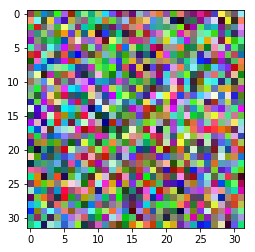

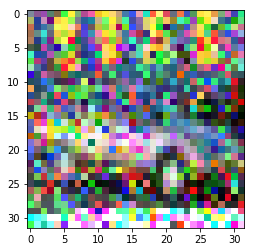

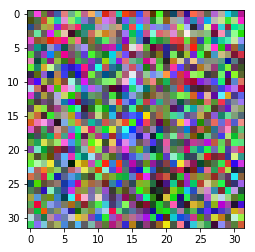

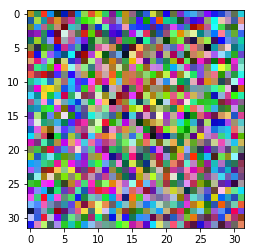

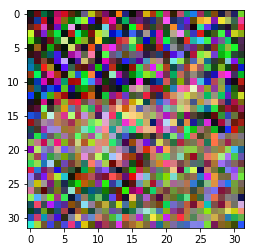

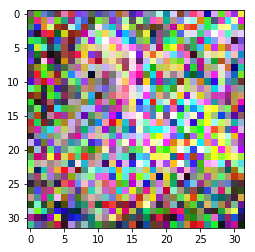

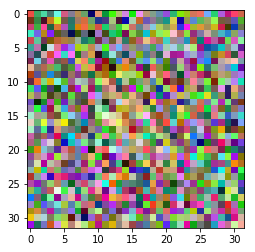

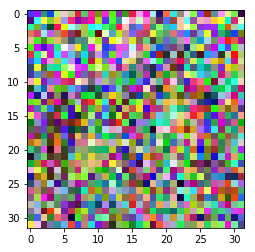

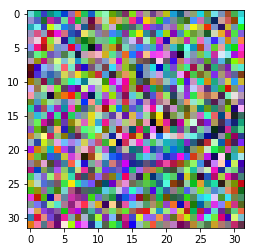

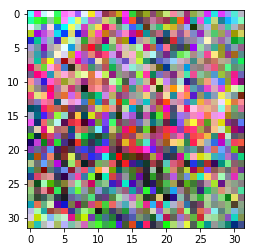

In [169]:
for x in fit_num:
    test_datapoint = x
    plt.imshow(test_datapoint.reshape(32, 32, 3))
    plt.show()

In [171]:
test = np.array(fit_num).reshape(10, 32, 32, 3)
r = model.predict(test)

for x in range(10):
    print("Accuracy for number {}: {}".format(x, r[x][x]))

Accuracy for number 0: 0.9660276174545288
Accuracy for number 1: 0.9633615016937256
Accuracy for number 2: 0.9646192789077759
Accuracy for number 3: 0.954217255115509
Accuracy for number 4: 0.9559621214866638
Accuracy for number 5: 0.9751131534576416
Accuracy for number 6: 0.9564897418022156
Accuracy for number 7: 0.9540126919746399
Accuracy for number 8: 0.950876772403717
Accuracy for number 9: 0.9679608345031738
